# Ocena czasu potrzebnego na dekodowanie filmu

Na podstawie zbioru (https://archive.ics.uci.edu/dataset/335/online+video+characteristics+and+transcoding+time+dataset)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Opis danych wejściowych i ich analiza

Rzut oka na pierwsze pięć wierszy podanego zbioru danych za pomocą funkcji head(). Zbiór danych data1 zawiera 22 atrybuty podane poniżej.

In [19]:
data1 = pd.read_csv('transcoding_mesurment.tsv', sep='\t')
data1.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


Zapoznanie się z krótkim opisem danych za pomocą funkcji info(). Funkcja ta ukazuje ogólne informacje o danych, takie jak liczba wierszy, typy danych, oraz ewentualne brakujące wartości.

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  b_size       68784 non-null  int64  
 14  size         68784 non-null  int64  
 15  o_codec      68784 non-null  object 
 16  o_bitrate    68784 non-null  int64  
 17  o_framerate  68784 non-null  float64
 18  o_width      68784 non-null  int64  
 19  o_he

Zbiór pierwszy składa się z 68784 przykładów i wydaje się niezbyt dużym zbiorem na potrzeby uczenia maszynowego, jednak jest idealny do demonstracji jego działania. Zauważyć można, że większość atrybutów zbioru ma wartości numeryczne (float64 i int64). 

Wyjątek stanowią trzy pola: id, codec i o_codec, których typem wartości jest object. Object jest nadrzędną klasą wszystkich klas w języku Python, co oznacza, że pola te mogą przechowywać dowolny obiekt stworzony w Pythonie (czyli dla pliku TSV każdy obiekt tekstowy). Po przyjrzeniu się wynikowi funkcji data1.head() nietrudno zauważyć, że wyniki tych trzech pól są powtarzalne, z czego wywnioskować można, że stanowią one wartości wyliczeniowe enum. 

Warto więc sprawdzić te wartości dodatkowo zliczając częstotliwość ich występowania funkcją value_counts(). Pozwala ona zobaczyć rozkład wartości w tych kolumnach.

In [21]:
data1["id"].value_counts()

id
04t6-jw9czg    841
2ApZ-KZ-pEk    841
3fpg-LlHcks    841
3fmy-4uvR9U    841
3_fF9rtYCQ0    841
              ... 
GXn0-yo-L0I      1
gZDG-8Te3tg      1
h52Y-SSyvoM      1
H5ae-PJpkwI      1
zZKo-QsY86U      1
Name: count, Length: 1099, dtype: int64

Dodatkowo dla zmiennych 'codec' i 'o_codec' korzystamy z kodowania kategorycznego (np. one-hot encoding), aby przekształcić je na postać liczbową. 

Funkcja pd.get_dummies służy do kodowania kolumn, które zawierają dane kategoryczne (np. tekst czy etykiety), na postać numeryczną. Tworzy ona nowe kolumny dla każdej unikalnej wartości w kolumnie oryginalnej, a następnie przypisuje wartości binarne w zależności od tego, która kategoria jest obecna w danym wierszu.

In [22]:
data1 = pd.get_dummies(data1, columns=['codec', 'o_codec'])

Id ma więc zarówno te wartości, które się powtarzają, jak i te, które w zbiorze są unikatowe. Pole codec ma 4 różne wartości, które może przybierać i żadna z nich nie występuje w zbiorze tylko jeden raz. Tak samo jest z wartościami wyjściowymi o_codec. Dodatkowo zauważyć można, że wartości w kolumnie codec i o_codec są takie same, tylko ich częstotliwość występowania jest różna.

## Analiza eksploracyjna

Analiza reszty pól metodą describe(), która daje możliwość podsumowania atrybutów numerycznych. Obejmuje ona średnie, odchylenia standardowe, minimum, maksimum i inne wartości opisujące dane.

In [23]:
data1.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


Z wywołania funkcji describe() wynika, że dla każdej kolumny istnieją 68784 niepuste wartości, co oznacza, że w zbiorze danych nie ma wartości pustych dla żadnej kolumny.

Z dużych różnic w wartościach średnich i odchyleniach standardowych wynika, że dane te są nieustandaryzowane, co oznacza, że nie zostały przekształcone w taki sposób, aby mieć wspólną skalę. 

Na podstawie wyników metody describe(), można wywnioskować, że nie zastosowano standaryzacji ani normalizacji, co może być spowodowane różnicami w jednostkach, w jakich wyrażane są dane oraz zakresach między różnymi kolumnami. 

Sprawdzimy teraz, jak wygląda cel przewidywań, czyli kolumna 'utime'.

Pracując z problemem regresji, zobaczwarto sprawdzić, jak rozkładają się wartości zmiennej celu. Może to pomóc w identyfikacji ewentualnych problemów.

In [24]:
print(data1['utime'].describe())

count    68784.000000
mean         9.996355
std         16.107429
min          0.184000
25%          2.096000
50%          4.408000
75%         10.433000
max        224.574000
Name: utime, dtype: float64


Wartości takie jak średnia i mediana dają ogólne wyobrażenie o średniej długości czasów kodowania filmów. Odchylenie standardowe wskazuje, jak bardzo dane są rozproszone wokół średniej. Wartości minimalna i maksymalna pozwalają nam zobaczyć zakres czasów trwania w zbiorze danych.

Kwantyle obrazują rozkład różnych czasów dekodowania ze względu na przedziały, w których się znajdują. Zauważyć można, że 25% czasów trwania jest krótszych niż 2.096 sekundy, a 75% jest krótszych niż 10.433 sekundy.

W celu zobaczenia rozkładów danych i znalezienia outlinerów skorzystamy z wizualizacji. Jest to możliwe za sprawą użycia metody histplot(), która dla otrzymanych danych generuje histogram. Przedstawia on częstotliwość występowania danych w danym przedziale.

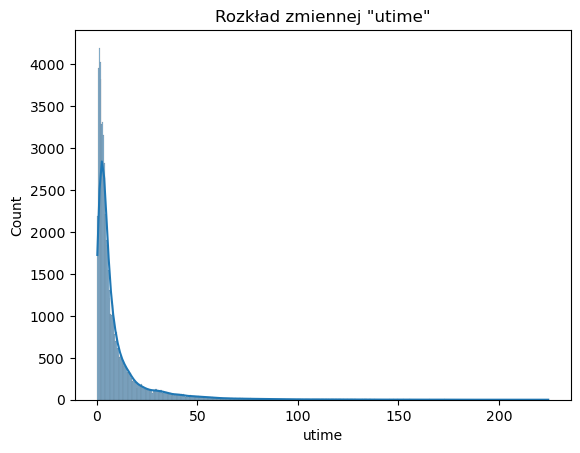

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data1['utime'], kde=True)
plt.title('Rozkład zmiennej "utime"')
plt.show()

Dzielimy teraz zbiór danych na dwie części: cechy i etykiety. 
Cechy to kolumny, na podstawie których model będzie dokonywał przewidywań. Należą  do nich wszystkie kolumny oprócz kolumn 'utime' oraz 'id' (identyfikatory są nieistotne przy trenowaniu modeli). 
Etykiety (inaczej targety) to wartości które chcemy przewidzieć. Targetem więc będzie kolumna 'utime', czyli czas potrzebny na dekodowanie filmu.

In [26]:
data = data1.drop(['utime', 'id'], axis=1)
target = data1['utime']

Z wcześniejszego wywołania funkcji describe() wynika, że dane numeryczne są nieustandaryzowane (średnie poszczególnych wierszy mogą się różnić nawet o parę rzędów wielkości, a standardowe odchylenia nie są równe 1). Możemy to zaobserwować wywołując dwie funkcje obliczające średnią i standardowe odchylenie.

In [27]:
numeric_data = data.select_dtypes(include='number')

In [28]:
print("Średnia")
print(numeric_data.mean(axis=0))
print("Standardowe odchylenie")
print(numeric_data.std(axis=0))

Średnia
duration       2.864139e+02
width          6.249342e+02
height         4.125722e+02
bitrate        6.937015e+05
framerate      2.324132e+01
i              1.008683e+02
p              6.531692e+03
b              9.147854e+00
frames         6.641708e+03
i_size         2.838987e+06
p_size         2.218057e+07
b_size         0.000000e+00
size           2.502294e+07
o_bitrate      1.395036e+06
o_framerate    2.119086e+01
o_width        8.023364e+02
o_height       5.038255e+02
umem           2.282247e+05
dtype: float64
Standardowe odchylenie
duration       2.872576e+02
width          4.631691e+02
height         2.406155e+02
bitrate        1.095628e+06
framerate      7.224848e+00
i              8.476479e+01
p              6.075872e+03
b              9.251618e+01
frames         6.153342e+03
i_size         4.325137e+06
p_size         5.097306e+07
b_size         0.000000e+00
size           5.414402e+07
o_bitrate      1.749352e+06
o_framerate    6.668703e+00
o_width        6.099598e+02
o_

Z powyższych danych możemy się przekonać, że dane numeryczne nie są ustandaryzowane. Za pomocą funkcji fit_transform z biblioteki sklearn.preprocessing standaryzujemy dane, aby uzyskać odchylenie standardowe równe 1.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [30]:
print("Średnia")
print(scaled_data.mean(axis=0))
print("Standardowe odchylenie")
print(scaled_data.std(axis=0))

Średnia
[ 2.64449495e-17  9.91685605e-18  1.25613510e-16  5.61955176e-17
  7.93348484e-17 -1.98337121e-17 -6.61123736e-18 -5.37163036e-18
 -5.28898989e-17 -3.63618055e-17  2.31393308e-17  0.00000000e+00
  0.00000000e+00  1.23340897e-16 -2.33304369e-16  1.38422782e-17
 -6.17737491e-17  2.64449495e-17]
Standardowe odchylenie
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


Po przeskalowaniu danych otrzymaliśmy ustandaryzowane dane numeryczne. Można to stwierdzić obserwując, że standardowe odchylenie we wszystkich przypadkach (oprócz jednego 0) wynosi 1, a różnica średnich między dwoma dowolnymi cechami wynosi co najwyżej dwa rzędy, poza wartościami, które równają się 0.

## Podział danych

Przygotowane ustandaryzowane dane zostały następnie podzielone na zbiór treningowy i zbiór testowy. Zbiór treningowy zawiera 80% danych całego zbioru danych, zbiór testowy 20%. Dzięki ustawieniu parametru random_state zapewnione jest, że dane, przy każdym uruchomieniu, będą podzielone na te same zbiory. 

In [31]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

W kolejnym etapie model zostaje przygotowany dzięki funkcji LinearRegression() z biblioteki Scikit-Learn oraz wytrenowany na danych treningowych przygotowanych w poprzednim punkcie.

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data_train, target_train)

LinearRegression()

Możemy teraz sprawdzić jego skuteczność przewidywania wartości wykorzystując ze zbioru testowego odpowiednie wartości data.

In [35]:
predictions = model.predict(data_test)

Aby ocenić, jak dobrze model radzi sobie na zbiorze testowym, korzystamy z metryk oceny regresji: błąd średniokwadratowy (MSE) oraz średni błąd bezwzględny (MAE). Możemy to osiągnąć wykorzystując wbudowane funkcje mean_squared_error() oraz mean_absolute_error() do obliczania odpowiednio MSE i MAE.

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(target_test, predictions)
mae = mean_absolute_error(target_test, predictions)

print(f'Przed eliminacją i obrobką outlinerow MSE: {mse}, MAE: {mae}')

Przed eliminacją i obrobką outlinerow MSE: 89.69928368549017, MAE: 5.711219118602806


**Błąd Średniokwadratowy (MSE):**

MSE to średnia z kwadratów różnic między rzeczywistymi a przewidywanymi wartościami.
Wartość MSE wynosi 89.70, co oznacza, że średni kwadrat różnicy między rzeczywistymi a przewidywanymi wartościami wynosi około 89.70.
Im niższa wartość MSE, tym lepiej. Wartość ta jest mierzona w jednostkach kwadratu jednostki zmiennej celu.


**Błąd Bezwzględny (MAE):**

MAE to średnia z bezwzględnych różnic między rzeczywistymi a przewidywanymi wartościami.
Wartość MAE wynosi 5.71, co oznacza, że średnia różnica bezwzględna między rzeczywistymi a przewidywanymi wartościami wynosi około 5.71.
Im niższa wartość MAE, tym lepiej. Wartość ta jest mierzona w jednostkach zmiennej celu.

Aby wizualnie pokazać, jak dobre są predykcje modelu stosujemy wykres rozproszenia (scatter). Pokazuje on, jak dobrze przewidywania modelu (oś Y) korelują z rzeczywistymi wartościami (oś Y). Im bliżej linii przekątnej, tym lepiej model radzi sobie w przewidywaniu.

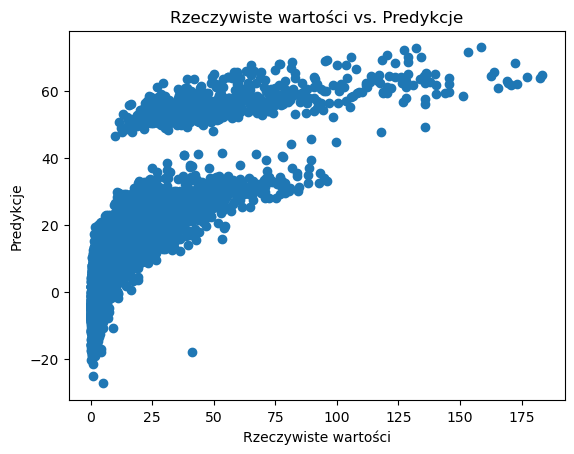

In [41]:
import matplotlib.pyplot as plt

plt.scatter(target_test, predictions)
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Predykcje")
plt.title("Rzeczywiste wartości vs. Predykcje")
plt.show()